<a href="https://colab.research.google.com/github/JulioSan02/UNCC/blob/4105/JS_4105_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.
# Ignore: "Report the classification accuracy over iterations".

import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

drive.mount('/content/drive')

file_path_1 = '/content/drive/MyDrive/Colab_Notebooks/Data/diabetes.csv'
dataset_1 = pd.DataFrame(pd.read_csv(file_path_1))
dataset_1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# Consider pregnancies, glucose, blood pressure, skin thickness, insulin, BMI,
# pedigree function, and age as independent variables (X1, X2, X3, X4, X5, X6, X7, X8)
# Consider outcome (having or not having diabetes) as the dependent Variable (Y).
X_1 = dataset_1.iloc[:, [0,1,2,3,4,5,6,7]].values
Y_1 = dataset_1.iloc[:, 8].values


In [40]:
# Split our Data set into Training Data and Test Data. Training data trains
# logistic model and test data validates logistic model.
# train_test_split from sklearn.model_selection will be used to split data.
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.2, random_state = 0)

# Use standard scaling from sSklearn to scale data between -_1 and _1 for better accuracy.
scale = StandardScaler()
X_train_1 = scale.fit_transform(X_train_1)
X_test_1 = scale.transform(X_test_1)

# Import LogisticRegression from sklearn.linear_model.
# Make an instance classifier of object LogisticRegression and give random_state =  0.
classifier_1 = LogisticRegression(penalty = None, random_state=0)
classifier_1.fit(X_train_1, Y_train_1)

Y_pred_1 = classifier_1.predict(X_test_1)


In [41]:
# Use confusion matrix to get accuracy of model.
cnf_matrix_1 = confusion_matrix(Y_test_1, Y_pred_1)
cnf_matrix_1

array([[98,  9],
       [18, 29]])

In [42]:
# Evaluate model using model evaluation metrics: accuracy, precision, recall, F_1 score.

recall_1 = metrics.recall_score(Y_test_1, Y_pred_1)
precision_1 = metrics.precision_score(Y_test_1, Y_pred_1)
accuracy_1 = metrics.accuracy_score(Y_test_1, Y_pred_1)

print("Recall for problem 1:", recall_1)
print("Precision for problem 1:", precision_1)
print("Accuracy for problem 1:", accuracy_1)

F1_score_1 = (2*recall_1*precision_1)/(recall_1+precision_1)

print("F1 score for problem 1:", F1_score_1)

Recall for problem 1: 0.6170212765957447
Precision for problem 1: 0.7631578947368421
Accuracy for problem 1: 0.8246753246753247
F1 score for problem 1: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

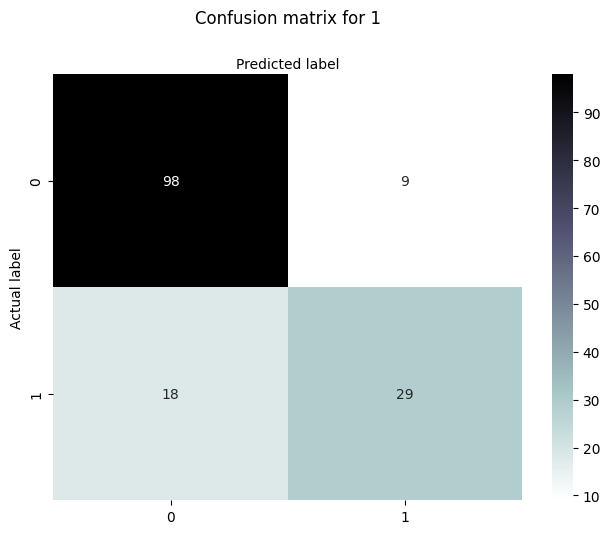

In [43]:
# Visualize results of model in form of a confusion matrix using matplotlib, seaborn, and heatmap.

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# Import new cancer dataset
file_path_2 = '/content/drive/MyDrive/Colab_Notebooks/Data/cancer.csv'
dataset_2 = pd.DataFrame(pd.read_csv(file_path_2))
dataset_2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
# Replace letters with number, B = 0 and M = 1
dataset_2['diagnosis'].replace('B', 0, inplace=True)
dataset_2['diagnosis'].replace('M', 1, inplace=True)

# dataset_2.tail()

In [46]:
# Consider radius_mean through fractal_dimension_worst
# as independent variables (X1 through X30)
# Consider outcome (having or not having diabetes) as the dependent Variable (Y).
X_2 = dataset_2.iloc[:, 2:32].values
Y_2 = dataset_2.iloc[:, 1].values

# X_2[0:10]

In [47]:
# Split our Data set into Training Data and Test Data. Training data trains
# logistic model and test data validates logistic model.
# train_test_split from sklearn.model_selection will be used to split data.
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 0)

# Use standard scaling from sSklearn to scale data between -1 and 1 for better accuracy.
X_train_2 = scale.fit_transform(X_train_2)
X_test_2 = scale.transform(X_test_2)

# Make an instance classifier of object LogisticRegression and give random_state =  0.
classifier_2a = LogisticRegression(penalty = None, random_state=0, max_iter=1000)
classifier_2a.fit(X_train_2, Y_train_2)

Y_pred_2a = classifier_2a.predict(X_test_2)
Y_pred_2a[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
cnf_matrix_2a = confusion_matrix(Y_test_2, Y_pred_2a)
cnf_matrix_2a

array([[64,  3],
       [ 2, 45]])

In [49]:
recall_2a = metrics.recall_score(Y_test_2, Y_pred_2a)
precision_2a = metrics.precision_score(Y_test_2, Y_pred_2a)
accuracy_2a = metrics.accuracy_score(Y_test_2, Y_pred_2a)

print("Recall for problem 2.a:", recall_2a)
print("Precision for problem 2.a:", precision_2a)
print("Accuracy for problem 2.a:", accuracy_2a)

F1_score_2a = (2*recall_2a*precision_2a)/(recall_2a+precision_2a)

print("F1 score for problem 2.a:", F1_score_2a)

Recall for problem 2.a: 0.9574468085106383
Precision for problem 2.a: 0.9375
Accuracy for problem 2.a: 0.956140350877193
F1 score for problem 2.a: 0.9473684210526315


Text(0.5, 427.9555555555555, 'Predicted label')

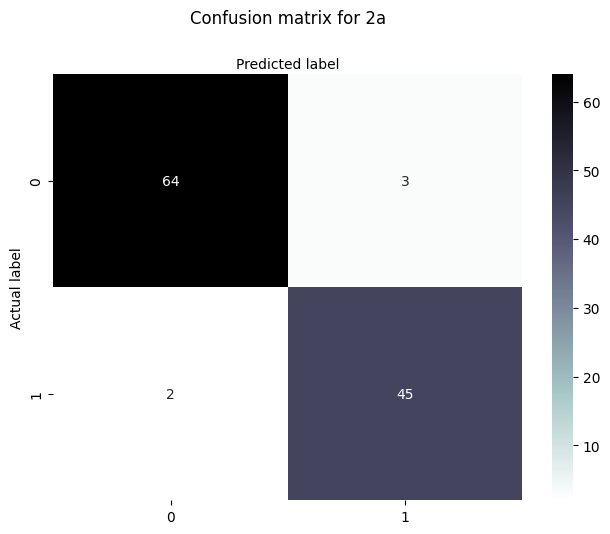

In [50]:
# Visualize results of model in form of a confusion matrix using matplotlib, seaborn, and heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_2a), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 2a', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
classifier_2b = LogisticRegression(penalty = 'l2', random_state=0, max_iter=1000)
classifier_2b.fit(X_train_2, Y_train_2)

Y_pred_2b = classifier_2b.predict(X_test_2)
Y_pred_2b[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
cnf_matrix_2b = confusion_matrix(Y_test_2, Y_pred_2b)
cnf_matrix_2b

array([[65,  2],
       [ 2, 45]])

In [53]:
recall_2b = metrics.recall_score(Y_test_2, Y_pred_2b)
precision_2b = metrics.precision_score(Y_test_2, Y_pred_2b)
accuracy_2b = metrics.accuracy_score(Y_test_2, Y_pred_2b)

print("Recall for problem 2.b:", recall_2b)
print("Precision for problem 2.b:", precision_2b)
print("Accuracy for problem 2.b:", accuracy_2b)

F1_score_2b = (2*recall_2b*precision_2b)/(recall_2b+precision_2a)

print("F1 score for problem 2.b:", F1_score_2b)

Recall for problem 2.b: 0.9574468085106383
Precision for problem 2.b: 0.9574468085106383
Accuracy for problem 2.b: 0.9649122807017544
F1 score for problem 2.b: 0.9675251959686451


Text(0.5, 427.9555555555555, 'Predicted label')

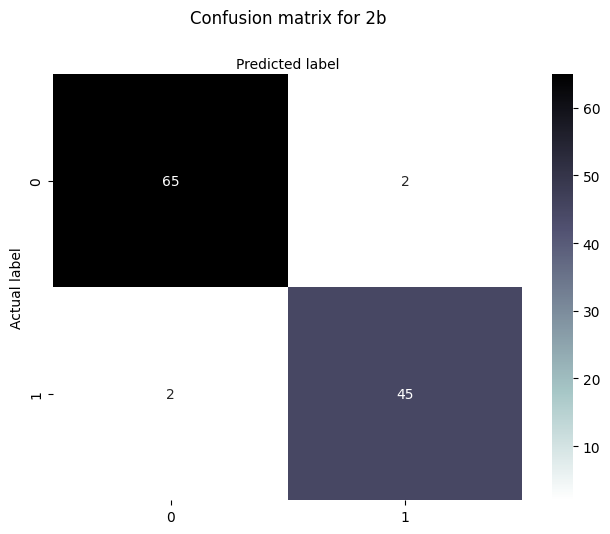

In [54]:
# Visualize results of model in form of a confusion matrix using matplotlib, seaborn, and heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_2b), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 2b', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
#Now let's try Naive Gaussian Bays

classifier_3 = GaussianNB()

X_train_3 = X_train_2
X_test_3 = X_test_2
Y_train_3 = Y_train_2
Y_test_3 = Y_test_2

classifier_3.fit(X_train_3, Y_train_3)

Y_pred_3  =  classifier_3.predict(X_test_3)

print(Y_pred_3[0:5])

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm_3 = confusion_matrix(Y_test_3, Y_pred_3)
ac_3 = accuracy_score(Y_test_3, Y_pred_3)
re_3 = recall_score(Y_test_3, Y_pred_3)
pre_3 = precision_score(Y_test_3, Y_pred_3)

F1_score_3 = (2*re_3*pre_3)/(pre_3+re_3)

print('Accuracy for problem 3:', ac_3)
print('Recall for problem 3:', re_3)
print('Precision for problem 3:', pre_3)
print('F1 score for problem 3:', F1_score_3)

[1 0 0 0 0]
Accuracy for problem 3: 0.9035087719298246
Recall for problem 3: 0.8936170212765957
Precision for problem 3: 0.875
F1 score for problem 3: 0.8842105263157894


Text(0.5, 427.9555555555555, 'Predicted label')

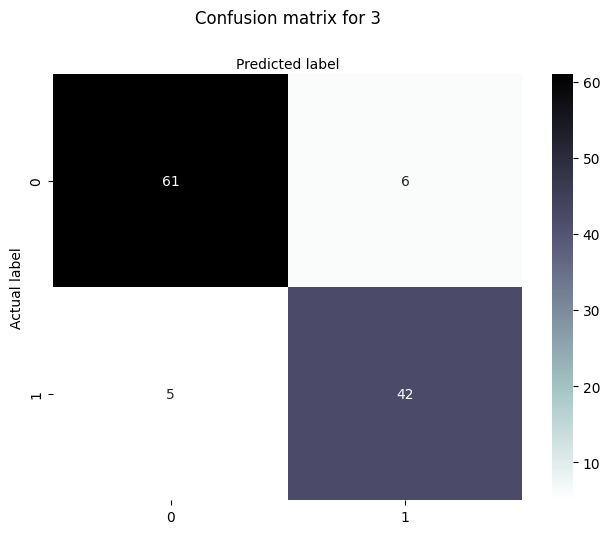

In [56]:
# Visualize results of model in form of a confusion matrix using matplotlib, seaborn, and heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_3), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
def PCA_function(X_train, X_test, K):
  pca = PCA(n_components=K)
  X_train_PCA = pca.fit_transform(X_train)
  X_test_PCA = pca.fit_transform(X_test)
  return X_train_PCA, X_test_PCA


In [58]:
X_train_4 = X_train_2
X_test_4 = X_test_2
Y_train_4 = Y_train_2
Y_test_4 = Y_test_2

accuracy_at_K_4 = 0

K_vector_4 = []
recall_4_vector = []
precision_4_vector = []
accuracy_4_vector = []
F1_score_4_vector = []

for K in range(1, 31):
  X_train_4_PCA, X_test_4_PCA = PCA_function(X_train_4, X_test_4, K)

  classifier_4 = LogisticRegression(random_state=0)
  classifier_4.fit(X_train_4_PCA, Y_train_4)

  Y_pred_4 = classifier_4.predict(X_test_4_PCA)

  K_vector_4.append(K)
  recall_4_vector.append(metrics.recall_score(Y_test_4, Y_pred_4))
  precision_4_vector.append(metrics.precision_score(Y_test_4, Y_pred_4))
  accuracy_4_vector.append(metrics.accuracy_score(Y_test_4, Y_pred_4))
  F1_score_4_vector.append(metrics.f1_score(Y_test_4, Y_pred_4))

  if (metrics.accuracy_score(Y_test_4, Y_pred_4) > accuracy_at_K_4):
    accuracy_at_K_4 = metrics.accuracy_score(Y_test_4, Y_pred_4)
    best_K_4 = K

print('Best K value  for problem 4: ', best_K_4)
print('\nAccuracy using best K for problem 4: ', accuracy_at_K_4)
print('\nRecall history for problem 4: ', recall_4_vector)
print('\nAccuracy history for problem 4: ', accuracy_4_vector)
print('\nPrecision history for problem 4: ', precision_4_vector)
print('\nF1 score history for problem 4: ', F1_score_4_vector)

table_4 = {'K': K_vector_4, 'Recall': recall_4_vector, 'Precision' : precision_4_vector, 'Accuracy' : accuracy_4_vector, 'F1 Score' : F1_score_4_vector}
final_table_4 = pd.DataFrame(table_4)
print('\n', final_table_4[: 10])


Best K value  for problem 4:  5

Accuracy using best K for problem 4:  0.9298245614035088

Recall history for problem 4:  [0.8936170212765957, 0.8936170212765957, 0.9148936170212766, 0.8723404255319149, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575, 0.9361702127659575]

Accuracy history for problem 4:  [0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.

In [59]:
cnf_matrix_4 = confusion_matrix(Y_test_4, Y_pred_4)
print('Confusion matrix: \n', cnf_matrix_4)

print('\nAccuracy for problem 4: ', accuracy_4_vector[best_K_4])
print('Recall for problem 4: ', recall_4_vector[best_K_4])
print('Precision for problem 4: ', precision_4_vector[best_K_4])
print('F1 score for problem 4: ', F1_score_4_vector[best_K_4])

Confusion matrix: 
 [[59  8]
 [ 3 44]]

Accuracy for problem 4:  0.9298245614035088
Recall for problem 4:  0.9361702127659575
Precision for problem 4:  0.8979591836734694
F1 score for problem 4:  0.9166666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

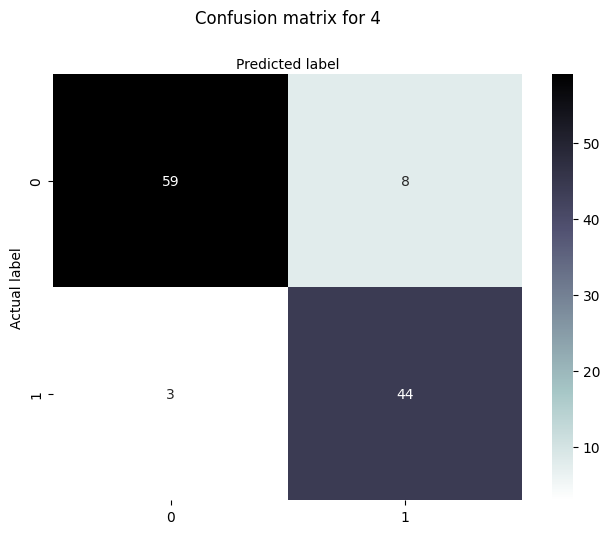

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_4), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 4', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
X_train_5 = X_train_2
X_test_5 = X_test_2
Y_train_5 = Y_train_2
Y_test_5 = Y_test_2

accuracy_at_K_5 = 0

K_vector_5 = []
recall_5_vector = []
precision_5_vector = []
accuracy_5_vector = []
F1_score_5_vector = []

classifier_5 = GaussianNB()

for K in range(1, 31):
  X_train_5_PCA, X_test_5_PCA = PCA_function(X_train_5, X_test_5, K)

  classifier_5 = GaussianNB()
  classifier_5.fit(X_train_5_PCA, Y_train_5)

  Y_pred_5 = classifier_5.predict(X_test_5_PCA)

  K_vector_5.append(K)
  recall_5_vector.append(metrics.recall_score(Y_test_5, Y_pred_5))
  precision_5_vector.append(metrics.precision_score(Y_test_5, Y_pred_5))
  accuracy_5_vector.append(metrics.accuracy_score(Y_test_5, Y_pred_5))
  F1_score_5_vector.append(metrics.f1_score(Y_test_5, Y_pred_5))

  if (metrics.accuracy_score(Y_test_5, Y_pred_5) > accuracy_at_K_5):
    accuracy_at_K_5 = metrics.accuracy_score(Y_test_5, Y_pred_5)
    best_K_5 = K

print('Best K value for problem 5: ', best_K_5)
print('\nAccuracy using best K for problem 5: ', accuracy_at_K_5)
print('\nRecall history for problem 5: ', recall_5_vector)
print('\nAccuracy history for problem 5: ', accuracy_5_vector)
print('\nPrecision history for problem 5: ', precision_5_vector)
print('\nF1 score history for problem 5: ', F1_score_5_vector)

table_5 = {'K': K_vector_5, 'Recall': recall_5_vector, 'Precision' : precision_5_vector, 'Accuracy' : accuracy_5_vector, 'F1 Score' : F1_score_5_vector}
final_table_5 = pd.DataFrame(table_5)
print('\n', final_table_5[: 10])


Best K value for problem 5:  5

Accuracy using best K for problem 5:  0.9122807017543859

Recall history for problem 5:  [0.851063829787234, 0.8936170212765957, 0.851063829787234, 0.8723404255319149, 0.851063829787234, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8085106382978723, 0.8085106382978723, 0.7659574468085106, 0.7659574468085106, 0.7446808510638298, 0.723404255319149, 0.723404255319149, 0.7021276595744681, 0.7021276595744681, 0.723404255319149, 0.7021276595744681, 0.723404255319149, 0.7021276595744681, 0.7021276595744681, 0.7021276595744681, 0.6808510638297872]

Accuracy history for problem 5:  [0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.87719298

In [62]:
cnf_matrix_5 = confusion_matrix(Y_test_5, Y_pred_5)
print('Confusion matrix: \n', cnf_matrix_5)

print('\nAccuracy for problem 5: ', accuracy_5_vector[best_K_5])
print('Recall for problem 5: ', recall_5_vector[best_K_5])
print('Precision for problem 5: ', precision_5_vector[best_K_5])
print('F1_score_4 for problem 5: ', F1_score_5_vector[best_K_5])

Confusion matrix: 
 [[63  4]
 [15 32]]

Accuracy for problem 5:  0.9035087719298246
Recall for problem 5:  0.8297872340425532
Precision for problem 5:  0.9285714285714286
F1_score_4 for problem 5:  0.8764044943820225


Text(0.5, 427.9555555555555, 'Predicted label')

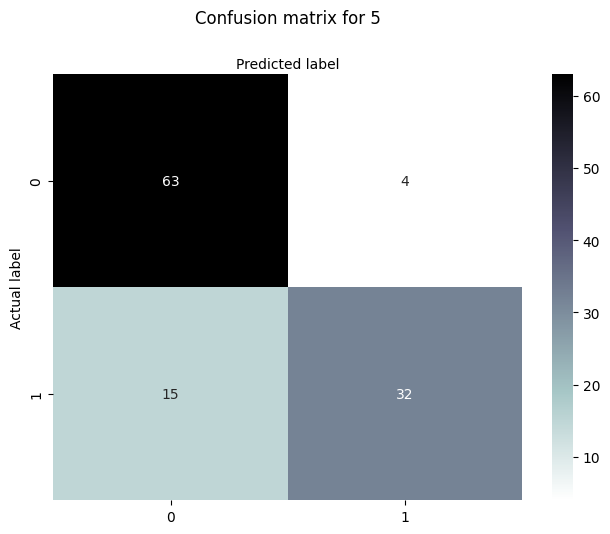

In [63]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_5), annot=True, cmap="bone_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for 5', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')